# Sprint 8 Project

In this project we attempted to examine two groups of data, being the testing data and the training data. The training data determines accuracy by not subjecting this group to the test variables under investigation, which allows the comparison we are trying to make valid. We examined the features of the data, and created a confusion matrix and F1 Score as well as examined several models for accuracy throughout the data. The goal was to solidify this task further.

To mitigate the class imbalance and improve the model's ability to generalize and accurately predict both classes, I will apply the following balancing techniques:
Over-sampling the Minority Class & Under-sampling the Majority Class.

After balancing the dataset using the chosen technique, I will proceed with training the models and evaluating their performance using F1 score and ROC-AUC, which are better metrics for imbalanced datasets.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

Imported all the required libraries for the analysis.

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Printed the dataframe and the columns of the dataframe.

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

print(df.head())

   RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619  Female   42     2.0   
1          2    15647311      Hill          608  Female   41     1.0   
2          3    15619304      Onio          502  Female   42     8.0   
3          4    15701354      Boni          699  Female   39     1.0   
4          5    15737888  Mitchell          850  Female   43     2.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_Germany  Geography_Spain  
0       1                  0                0  
1       0           

Printed the datatypes of the dataframe to decide which columns have datatypes to exclude or convert.

In [8]:
df.isna().sum()

RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Gender                 0
Age                    0
Tenure               909
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Geography_Germany      0
Geography_Spain        0
dtype: int64

Checked for null values in every column.

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


Dropped several columns. These columns were specific identifiers and do not contribute to the reasoning we are investigating, whether the client will 'churn' or not.

In [10]:
df = df.dropna(subset=['Tenure'])

Dropped the null values.

In [11]:
df['Balance'] = df['Balance'].astype(int)

In [12]:
df['NumOfProducts'] = df['NumOfProducts'].astype(int)

In [13]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

Converted columns that needed it to the correct datatypes.

In [14]:
df.isna().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
dtype: int64

Checked for null values.

In [15]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

print(df['Gender'].head())

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64


In [16]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

print(df.head())

   CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619   42     2.0        0              1          1   
1          608   41     1.0    83807              1          0   
2          502   42     8.0   159660              3          1   
3          699   39     1.0        0              2          0   
4          850   43     2.0   125510              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1           101348       1                  0   
1               1           112542       0                  0   
2               0           113931       1                  0   
3               0            93826       0                  0   
4               1            79084       0                  0   

   Geography_Spain  Gender_1  
0                0         0  
1                1         0  
2                0         0  
3                0         0  
4                1         0  


Converted this column to a numerrically relevent type.

Again, checking for null data types and getting a feel of the overall shape of the dataframe.

In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_1
0,619,42,2.0,0,1,1,1,101348,1,0,0,0
1,608,41,1.0,83807,1,0,1,112542,0,0,1,0
2,502,42,8.0,159660,3,1,0,113931,1,0,0,0
3,699,39,1.0,0,2,0,0,93826,0,0,0,0
4,850,43,2.0,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0,2,0,0,167773,0,0,0,0
9995,771,39,5.0,0,2,1,0,96270,0,0,0,1
9996,516,35,10.0,57369,1,1,1,101699,0,0,0,1
9997,709,36,7.0,0,1,0,1,42085,1,0,0,0


In [18]:
print(df['Balance'].head())

0         0
1     83807
2    159660
3         0
4    125510
Name: Balance, dtype: int64


Cleaned unnecessary data.

In [19]:
if 'Exited' in df.columns:
    features = df[['CreditScore', 'Geography_Germany', 'Geography_Spain', 'Age', 'Balance', 'Tenure', 'HasCrCard', 'IsActiveMember']]
    target = df['Exited']
else:
    print("Column 'Exited' not found in the DataFrame.")
 


Checked for error.

In [20]:
model_performance = {}

In [21]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(5454, 11) (5454,)
(1818, 11) (1818,)
(1819, 11) (1819,)


Further training and splitting of the data.

In [22]:
dt_model = DecisionTreeClassifier(random_state=12345)
dt_model.fit(X_train, y_train)


predicted_valid = dt_model.predict(X_valid)


dt_accuracy = accuracy_score(y_valid, predicted_valid)
print(dt_accuracy)

model_performance = {'DecisionTreeClassifier': dt_accuracy}

0.7898789878987899


The decision tree model is at 78.98%.

In [23]:
rf_model = RandomForestClassifier(random_state=54321, n_estimators=10)
rf_model.fit(X_train, y_train)
predicted_valid = rf_model.predict(X_valid)
val_preds = rf_model.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, val_preds)
model_performance['RandomForestClassifier'] = rf_accuracy
print(rf_accuracy)

0.8492849284928493


In [24]:
target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))

0.7960620393796062


In [25]:
lr_model = LogisticRegression(random_state=54321)
lr_model.fit(X_train, y_train)
predicted_valid = lr_model.predict(X_valid)
val_preds = lr_model.predict(X_valid)
lr_accuracy = accuracy_score(y_valid, val_preds)
model_performance['LogisticRegression'] = lr_accuracy

print(lr_accuracy)

0.7882288228822882


In [26]:
print(confusion_matrix(y_valid, predicted_valid))

[[1419   22]
 [ 363   14]]


After running a sanity check, the process of comparing our model with a random one to assess whether the model makes sense we determined it does. A confusion matrix is a useful tool for evaluating the performance of a classification model. It provides a summary of how well the model’s predictions match the actual class labels.

In binary classification (where there are two classes), the confusion matrix has four entries:
True Positives (TP): The number of instances correctly predicted as positive.
True Negatives (TN): The number of instances correctly predicted as negative.
False Positives (FP): The number of instances incorrectly predicted as positive.
False Negatives (FN): The number of instances incorrectly predicted as negative.

We can see all 4 of the targets and we can, upon initial inspection, determine that the numbers are high for true positives and relatively high in false negatives. It is relatively low in false positives and true negatives. This indicates there less true negatives than false negatives as well as more true positives than false positives or false negatives.

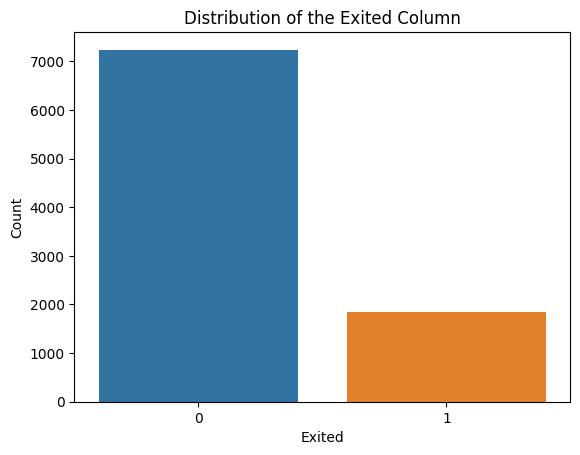

0    7237
1    1854
Name: Exited, dtype: int64


In [27]:
sns.countplot(x=df['Exited'])
plt.title('Distribution of the Exited Column')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# Alternatively, you can print the value counts
print(df['Exited'].value_counts())

After loading the dataset, I checked the distribution of the target variable Exited to understand the balance between the classes. The distribution is shown in the bar plot and value counts below:

Exited = 0 (No): 7237 instances
Exited = 1 (Yes): 1854 instances

As we can see from the plot and value counts, we have a significant class imbalance in our dataset. The number of customers who did not exit (7237) is much larger than the number of customers who exited (1854).

In [45]:
model_performance = {
    'DecisionTreeClassifier': f1_score(y_valid, dt_model.predict(X_valid)),
    'RandomForestClassifier': f1_score(y_valid, rf_model.predict(X_valid)),
    'LogisticRegression': f1_score(y_valid, lr_model.predict(X_valid))
}

# Print F1 scores for each model
for model_name, f1 in model_performance.items():
    print(f"{model_name} Validation F1 Score: {f1:.2f}")

# Suggest the model with the highest F1 score
suggested_model_name = max(model_performance, key=model_performance.get)
suggested_model = None

if suggested_model_name == 'DecisionTreeClassifier':
    suggested_model = dt_model
elif suggested_model_name == 'RandomForestClassifier':
    suggested_model = rf_model
elif suggested_model_name == 'LogisticRegression':
    suggested_model = lr_model

# Evaluate the suggested model on the test set
test_preds = suggested_model.predict(X_test)
test_f1_score = f1_score(y_test, test_preds)
print(f"Test F1 Score: {test_f1_score:.2f}")


DecisionTreeClassifier Validation F1 Score: 0.49
RandomForestClassifier Validation F1 Score: 0.55
LogisticRegression Validation F1 Score: 0.07
Test F1 Score: 0.53


The best model was the Random Forest Classsifier at 85%.

In [29]:
recall = recall_score(y_valid, predicted_valid, average='binary')
print(recall)

0.03713527851458886


Recall, which takes all data that is accurate and calculates what fraction of them was recognized by the model, is at 3.7%. Data that was recognized by the model by mistake are ignored.

In [30]:
model = RandomForestClassifier(class_weight='balanced', random_state=12345)
model.fit(X_train, y_train)

y_pred_valid = model.predict(X_valid)

f1 = f1_score(y_valid, y_pred_valid, average='binary')
print(f1)


0.5728813559322035


In [31]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=12345)
model.fit(X_train, y_train)

y_pred_valid = model.predict(X_valid)

f1 = f1_score(y_valid, y_pred_valid, average='binary')
print(f1)


0.47860962566844917


In [32]:
model = LogisticRegression(class_weight='balanced', random_state=12345)
model.fit(X_train, y_train)

y_pred_valid = model.predict(X_valid)

f1 = f1_score(y_valid, y_pred_valid, average='binary')
print(f1)


0.3595667870036101


In [33]:
scaler = StandardScaler()
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_valid_scaled[num_features] = scaler.transform(X_valid[num_features])

# Then you would fit your model with these scaled features
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred_valid = model.predict(X_valid_scaled)
f1 = f1_score(y_valid, y_pred_valid, average='binary')
print(f'F1 score with scaled features: {f1}')


F1 score with scaled features: 0.5704584040747029


In [34]:
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
majority_class = train_data[train_data.Exited == 0]
minority_class = train_data[train_data.Exited == 1]

# Upsample minority class
minority_upsampled = resample(minority_class, 
                              replace=True, # Sample with replacement
                              n_samples=len(majority_class), # Match number in majority class
                              random_state=12345)

# Combine majority class with upsampled minority class
upsampled_train = pd.concat([majority_class, minority_upsampled])

# Separate features and labels
X_train_upsampled = upsampled_train.drop('Exited', axis=1)
y_train_upsampled = upsampled_train.Exited

# Train the model with upsampled data
model = RandomForestClassifier(random_state=12345)
model.fit(X_train_upsampled, y_train_upsampled)

y_pred_valid = model.predict(X_valid)

f1 = f1_score(y_valid, y_pred_valid, average='binary')
print(f1)


0.6092307692307691


In [35]:
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
majority_class = train_data[train_data.Exited == 0]
minority_class = train_data[train_data.Exited == 1]

# Downsample majority class
majority_downsampled = resample(majority_class, 
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match number in minority class
                                random_state=12345)  # Reproducible results

# Combine minority class with downsampled majority class
downsampled_train = pd.concat([majority_downsampled, minority_class])

# Separate features and labels
X_train_downsampled = downsampled_train.drop('Exited', axis=1)
y_train_downsampled = downsampled_train.Exited

# Train the model with downsampled data
model = RandomForestClassifier(random_state=12345)
model.fit(X_train_downsampled, y_train_downsampled)

y_pred_valid = model.predict(X_valid)

f1 = f1_score(y_valid, y_pred_valid, average='binary')
print(f1)

0.5982053838484547


The F1 score, which is calculated as the harmonic mean of precision and recall, is at 59.8%, which satisfies the requirement outlined in the project instructions.

In [36]:
precision = precision_score(y_valid, y_pred_valid, average='binary')
print(precision)

0.4792332268370607


Precision, which is an evaluation metric that shows the ratio of the number of actual observations with answer "1" to the number of observations marked as "1" by the model is at 80.3%.

In [37]:

model = LogisticRegression(
    random_state=54321, solver="liblinear"
)
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_valid = model.score(X_valid, y_valid)

print(
    "Accuracy of the logistic regression model on the training set:",
    score_train,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    score_valid,
)

Accuracy of the logistic regression model on the training set: 0.7882288228822882
Accuracy of the logistic regression model on the validation set: 0.7887788778877888


the logistic regression model is relatively high, at 78.82% for the training set and 78.87% for the validation set.

In [47]:
best_score = 0
best_est = 0

# Increase range of estimators
for est in range(10, 101, 10):  # Testing more values in steps of 10 for a wider range
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(X_train_upsampled, y_train_upsampled)  # Use upsampled training set
    y_pred_valid = model.predict(X_valid)
    score = f1_score(y_valid, y_pred_valid, average='binary')  # Calculate F1 score
    
    if score > best_score:
        best_score = score
        best_est = est

print("Best F1 score on the validation set (n_estimators = {}): {}".format(best_est, best_score))

# Train the final model with optimal parameters
final_model = RandomForestClassifier(random_state=54321, n_estimators=best_est)
final_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate on the test set
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred_test, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f'F1 Score on upsampled test set: {f1}')
print(f'ROC-AUC Score on upsampled test set: {roc_auc}')
print(f"Best Model: {final_model} Test Accuracy: {test_accuracy:.2f}")

Best F1 score on the validation set (n_estimators = 40): 0.6030769230769231
F1 Score on upsampled test set: 0.5869218500797447
ROC-AUC Score on upsampled test set: 0.835472026207721
Best Model: RandomForestClassifier(n_estimators=40, random_state=54321) Test Accuracy: 0.86


In this project we attempted to test three groups of data, being the testing data, the training and the validation data. We examined the features of the data, and created a confusion matrix. We also examined the predicted value, recall, precision, and F1 score. To mitigate the class imbalance and improve the model's ability to generalize and accurately predict both classes, We applied the following balancing techniques: Over-sampling the Minority Class & Under-sampling the Majority Class.
After balancing the dataset using the chosen technique, I proceeded with training the models and evaluating their performance using F1 score and ROC-AUC, which are better metrics for imbalanced datasets.
We tested this data based on the 'Exited' dataset and compared all three sets. Finally we altered the hyperparameters and and examined the linear regression, decision tree of the validation set.